# HW 3 Dun A

 Home task: 

1) explore whether there are any dependences between reading/writing/math_scores

2) find out whether student's race or/and paretns' level_of_education influences lunch_type of their children

3)  attach all proving plots

## Data

In [90]:
import pandas as pd
import seaborn as sns
import scipy as sc

from scipy import stats
import pylab as py 
import numpy as np
import scipy.stats as scs
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [3]:
student_perform = pd.read_csv("/Users/GuloLynx/Downloads/StudentsPerformance.csv")

In [4]:
student_perform.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [26]:
student_perform.columns = [x.replace(" ", "_") for x in student_perform.columns]
student_perform.tail()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


# 1st task
Correlations b/w math(M), reading(R), writing(W) scores

Text(0.5,1,'Math')

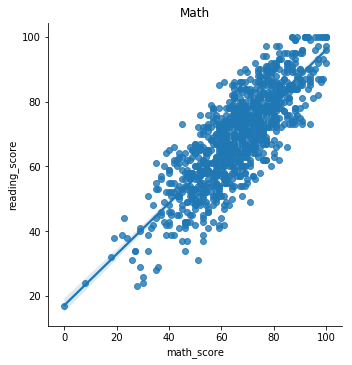

In [53]:

#plots to see the character of dependency
sns.lmplot(x='math_score', y='reading_score', data=student_perform)
py.title("Math")


Text(0.5,1,'Writing')

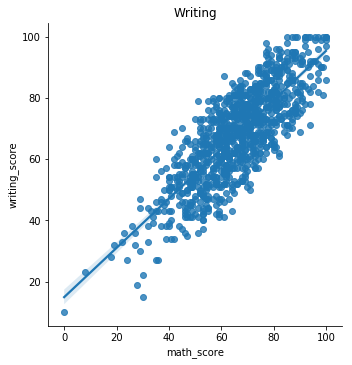

In [34]:
sns.lmplot(x='math_score', y='writing_score', data=student_perform)
py.title("Writing")


Text(0.5,1,'Reading')

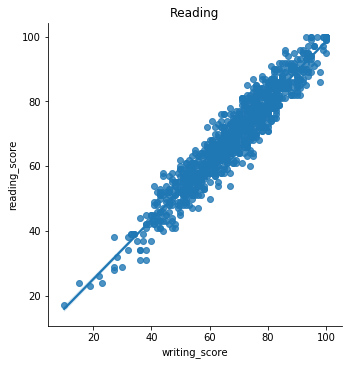

In [35]:
sns.lmplot(x='writing_score', y='reading_score', data=student_perform)
py.title("Reading")

In [ ]:
#Looks like we have linear dependency

In [14]:
#First we need to decide which coefficient to use
#In other words, we need to perform Shapiro-Wilk test (normality test). 
#If we would have more than 2000 obs, we used Kholmogorov-Smirnov test 

score = student_perform.filter(like="score")
print(stats.shapiro(score[['math_score']]))
print(stats.shapiro(score[['reading_score']]))
print(stats.shapiro(score[['writing_score']]))

(0.9931508302688599, 0.0001453401637263596)
(0.9929210543632507, 0.0001056220498867333)
(0.9919633269309998, 2.9172901122365147e-05)


In [17]:
#p-values are less than 0.05, so we must reject H0 
#now let's check qq plots for each score

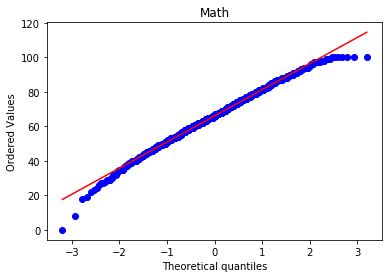

In [18]:
stats.probplot(score.math_score, dist="norm", plot=py)
py.title("Math")
py.show()

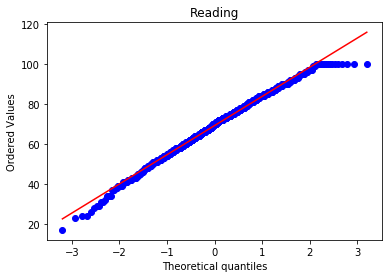

In [19]:
stats.probplot(score.reading_score, dist="norm", plot=py)
py.title("Reading")
py.show()

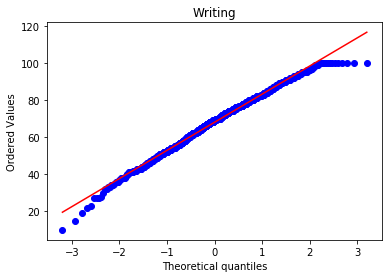

In [20]:
stats.probplot(score.writing_score, dist="norm", plot=py)
py.title("Writing")
py.show()

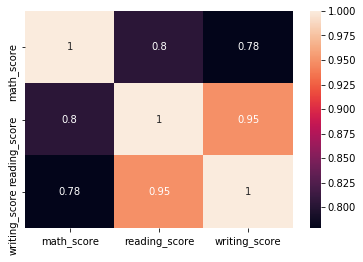

In [31]:
#So, we will use Spearman coefficient because our data isn't normal


corr = score.corr(method="spearman")
sns.heatmap(corr, annot=True)



We see strong correlation between R/W. 
And there are some correlations between other scores (R/M and M/W)too.
Let's check correlation between R/W and build linear regression model

Linear models (one predictor): pre-requisites
* Linear dependency look In [53]
* Normal distribution of residuals (look In [73])
* Homoscedasticity (look In [50])

In [55]:

X= np.array(score["reading_score"]).reshape(-1,1)
Y= np.array(score["writing_score"]).reshape(-1,1)


regressor = LinearRegression()  
regressor.fit(X, Y) 

print(regressor.coef_)

y_predicted = regressor.predict(X)

[[0.99353111]]


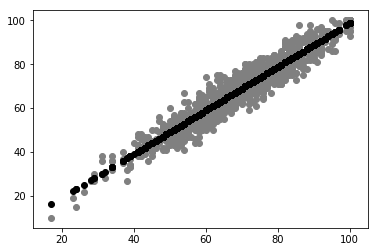

In [56]:
#visualization of linear model
plt.scatter(X, Y,  color='gray')
plt.scatter(X, y_predicted, color='black')

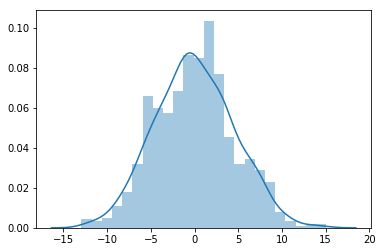

In [73]:
#Now  we can check distribution of residuals
residuals_pre = pd.DataFrame({'obs': Y.flatten(), 'exp': y_predicted.flatten()})
residuals = (residuals_pre['obs'] - residuals_pre['exp'])
sns.distplot(residuals)


In [74]:
stats.shapiro(residuals)

(0.9967348575592041, 0.03681955114006996)

## 2nd Task

## Data

In [75]:
race_lunch = pd.crosstab(index = student_perform['race/ethnicity'], 
                         columns = student_perform['lunch'])
race_lunch

lunch,free/reduced,standard
race/ethnicity,,
group A,36,53
group B,69,121
group C,114,205
group D,95,167
group E,41,99


In [76]:
parent_lunch = pd.crosstab(index = student_perform['parental_level_of_education'], 
                         columns = student_perform['lunch'])
parent_lunch

lunch,free/reduced,standard
parental_level_of_education,,
associate's degree,77,145
bachelor's degree,44,74
high school,70,126
master's degree,24,35
some college,79,147
some high school,61,118


# data visualization

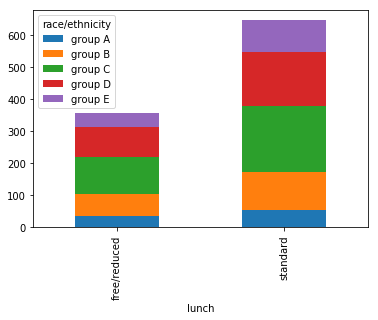

In [84]:
race_lunch.T.plot(kind = 'bar', stacked = True)


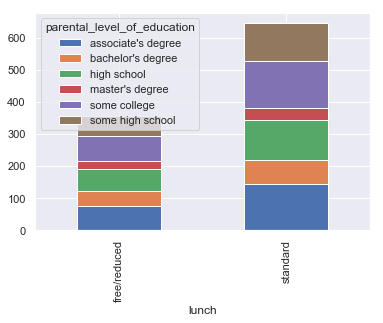

In [97]:
sns.set()
parent_lunch.T.plot(kind = 'bar', stacked = True)


## chi-test

In [86]:
#As we see, there are no dependencies (at first glance)
#To be sure we will perform chi test (hope it's enough)

In [101]:
stat_race = scs.chi2_contingency(race_lunch)
stat_race

(3.4423502326273185, 0.48669808284196503, 4, array([[ 31.595,  57.405],
        [ 67.45 , 122.55 ],
        [113.245, 205.755],
        [ 93.01 , 168.99 ],
        [ 49.7  ,  90.3  ]]))

Chisq pval = 0.49

In [102]:
stat_parent = scs.chi2_contingency(parent_lunch)
stat_parent

(1.1112675079168055, 0.9531014927218224, 5, array([[ 78.81 , 143.19 ],
        [ 41.89 ,  76.11 ],
        [ 69.58 , 126.42 ],
        [ 20.945,  38.055],
        [ 80.23 , 145.77 ],
        [ 63.545, 115.455]]))

Chisq pval  = 0.95

p-values are large so we can't reject H0. We can suggest that there is no dependency between race or parent's education and lunch type